In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Charger les données
file_path = 'dataset_modele_ia_2021.csv'
data = pd.read_csv(file_path)

In [7]:
# Nettoyage des données
# Remplacer les virgules et convertir les colonnes en numérique
cols_to_convert = ['Cambriolages de logement', 'Trafic de stupéfiants', 'Vols avec armes']

for col in cols_to_convert:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Sélection des features (en incluant toutes les tranches d'âge)
X = data.drop(columns=['Libelle_Commune', 'Code_Commune', 'Candidat_Max_Voix_T1_2022_Encoded', 'Nombre_Voix_Max_T1_2022'])
y = data['Candidat_Max_Voix_T1_2022_Encoded']

In [8]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction et entraînement du modèle AdaBoost
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Affichage des résultats
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.85      0.87        34
           2       0.00      0.00      0.00         1

    accuracy                           0.76        42
   macro avg       0.44      0.43      0.43        42
weighted avg       0.78      0.76      0.77        42



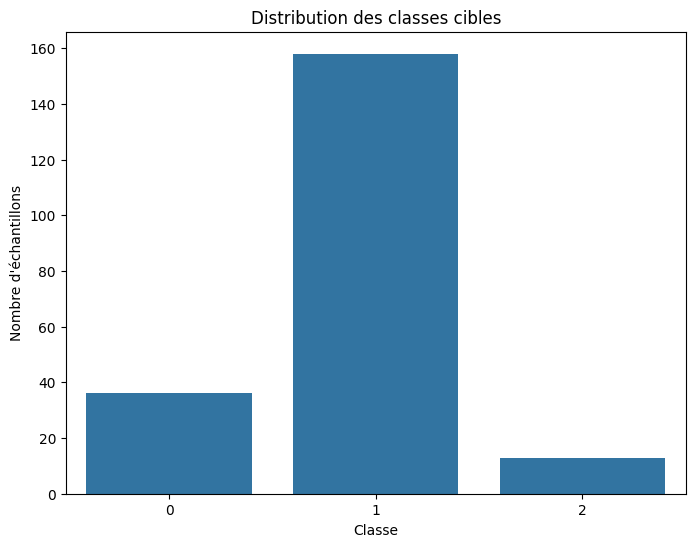

In [9]:
# 1. Distribution des classes cibles
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution des classes cibles')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()

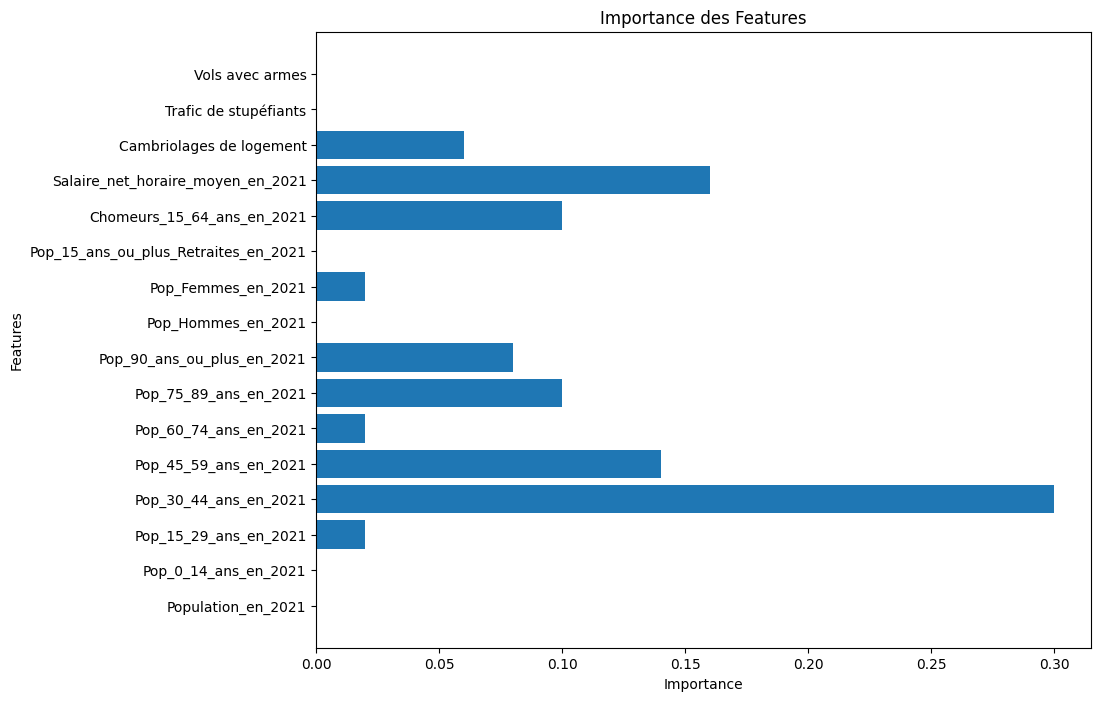

In [10]:
# 2. Importance des features
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances)
plt.title('Importance des Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

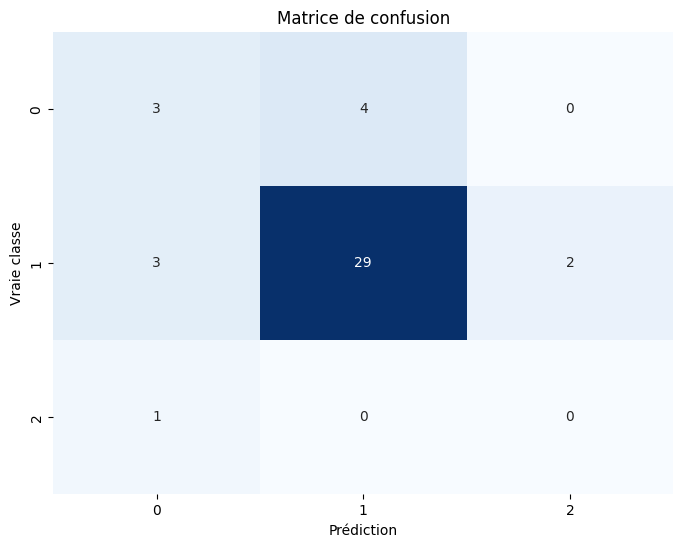

In [11]:
# 3. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie classe')
plt.show()
